<a href="https://colab.research.google.com/github/evilNami/CoinSight/blob/main/CoinSight_Unveiling_Cryptocurrency_Trends_with_Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

Over the past decade, cryptocurrencies such as Bitcoin (BTC) and Ethereum (ETH) have shifted from niche experiments to widely recognized financial assets, even as their inherent volatility persists. This volatility, driven by factors like speculative trading, regulatory news, and even market manipulation, makes accurate price forecasting both essential and challenging for investors and risk managers.

To address these challenges, this project adopts a comprehensive, data-driven approach by initially comparing some popular predictive models. By collecting historical price and volume data, applying feature engineering, and evaluating performance with standard metrics, the study aims to provide insights and advance the application of predictive analytics and  machine learning in volatile financial markets.

**Dataset and Initial Preparation**

We use historical daily price data for Bitcoin and Ethereum (publicly available from CoinMarketCap via https://github.com/evilNami/CoinSight)​. The dataset includes daily Open, High, Low, Close, Volume for each asset. We loaded the data into Pandas DataFrames and parsed the dates, then performed basic check for missing values.

In [ ]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
bitcoin_url = "https://raw.githubusercontent.com/evilNami/Cryptocurrency-Dataset/main/Bitcoin.csv"
ethereum_url = "https://raw.githubusercontent.com/evilNami/Cryptocurrency-Dataset/main/ethereum.csv"

bitcoin_data = pd.read_csv(bitcoin_url)
ethereum_data = pd.read_csv(ethereum_url)

# Convert the 'Date' column to datetime format
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'], errors= 'coerce')
ethereum_data['date'] = pd.to_datetime(ethereum_data['date'], errors= 'coerce')

# Sort datasets by Date for proper time-series visualization
bitcoin_data.sort_values(by='Date', inplace= True)
ethereum_data.sort_values(by='date', inplace= True)

#Preview the Datasets
print("Bitcoin Dataset:")
print("\n")
print(bitcoin_data.head())
print("\n")
print(bitcoin_data.info())
print("\n")

print("Ethereum Dataset:")
print(ethereum_data.head())
print("\n")
print(ethereum_data.info())
print("\n")

Bitcoin Dataset:


        Date          Open          High           Low         Close  \
0 2019-06-18   9128.269531   9149.763672   8988.606445   9062.045898   
1 2019-06-19   9068.174805   9277.677734   9051.094727   9271.459961   
2 2019-06-20   9271.567383   9573.689453   9209.416992   9519.200195   
3 2019-06-21   9526.833984  10130.935547   9526.833984  10127.998047   
4 2019-06-22  10151.890625  11171.013672  10083.189453  10719.981445   

     Volume Currency  
0  952850.0      USD  
1  131077.0      USD  
2   83052.0      USD  
3   76227.0      USD  
4   84485.0      USD  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1151 non-null   datetime64[ns]
 1   Open      1151 non-null   float64       
 2   High      1151 non-null   float64       
 3   Low       1151 non-null   float64       
 4   Close     1151 non-nu

In [ ]:
# Missing values
print("Missing values in Bitcoin dataset:")
print(bitcoin_data.isnull().sum())
print("\n")
print("Missing values in Ethereum dataset:")
print(ethereum_data.isnull().sum())


Missing values in Bitcoin dataset:
Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64


Missing values in Ethereum dataset:
date        0
Open        0
High        0
Low         0
Close       0
price       0
Currency    0
dtype: int64


To understand the data, we first visualized the price time series and distributions.

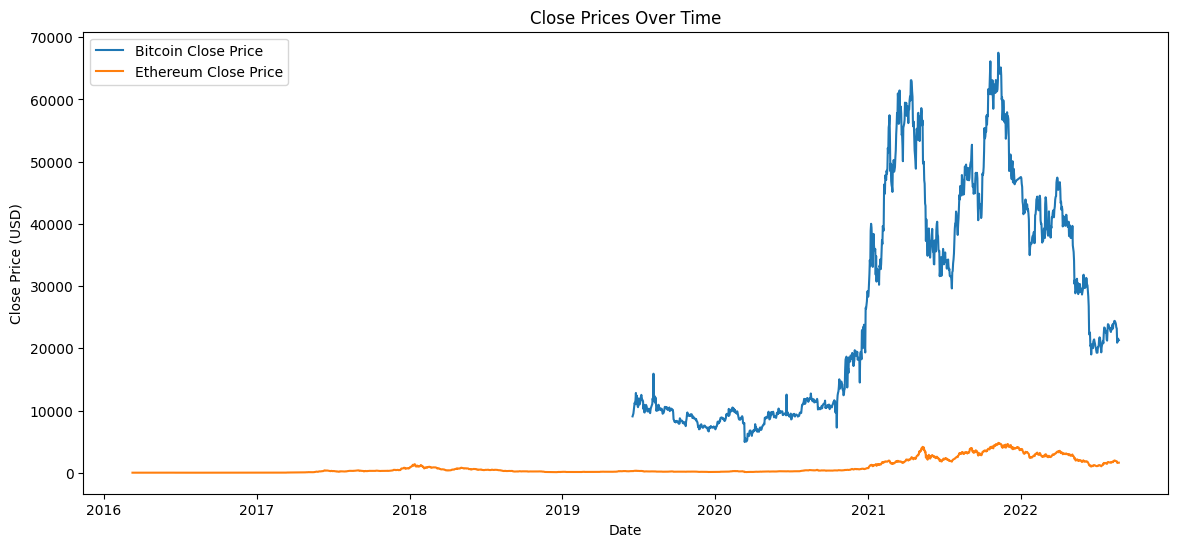

In [ ]:
# Plot Close price over time
plt.figure(figsize=(14, 6))
plt.plot(bitcoin_data['Date'], bitcoin_data['Close'], label='Bitcoin Close Price')
plt.plot(ethereum_data['date'], ethereum_data['Close'], label='Ethereum Close Price')
plt.title("Close Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.show()


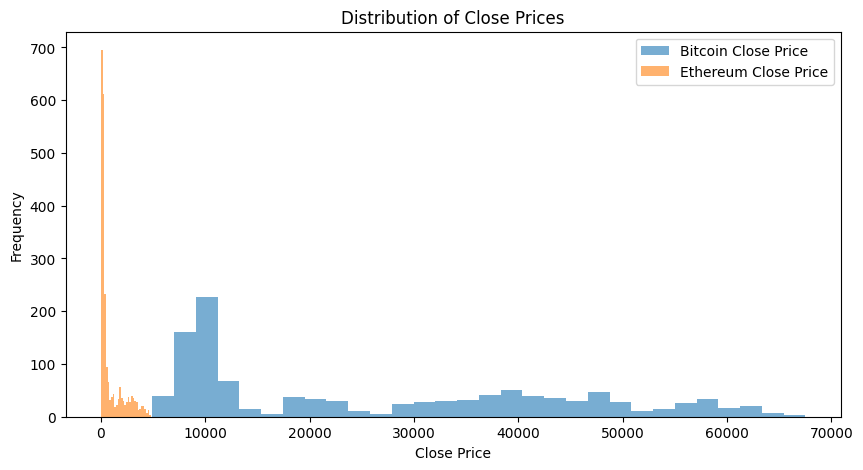

In [ ]:
# Histograms for Close price
plt.figure(figsize=(10, 5))
plt.hist(bitcoin_data['Close'], bins=30, alpha=0.6, label='Bitcoin Close Price')
plt.hist(ethereum_data['Close'], bins=30, alpha=0.6, label='Ethereum Close Price')
plt.title("Distribution of Close Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()

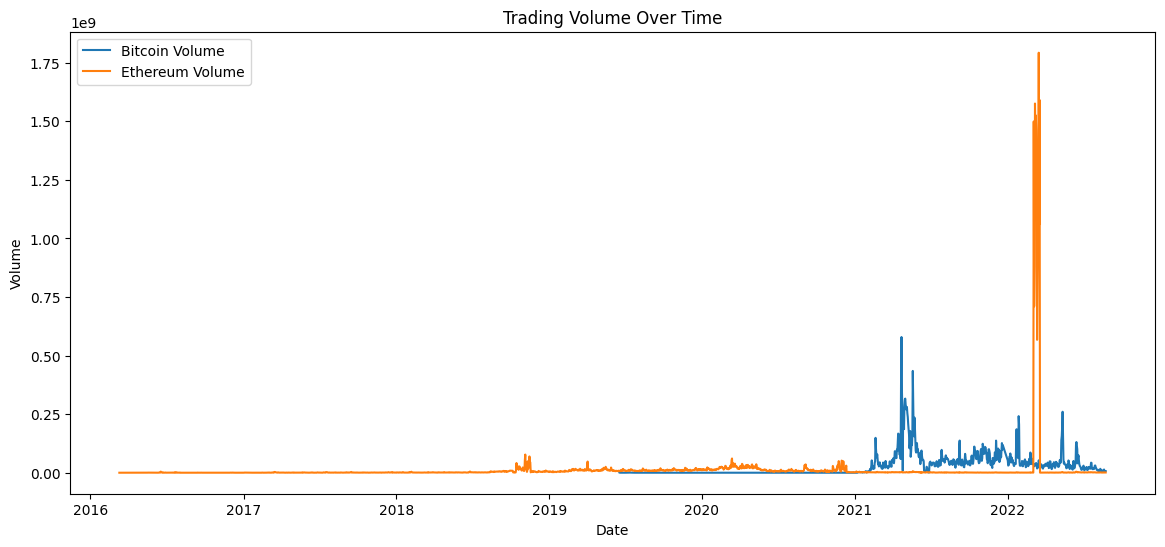

In [ ]:
# 2. Plot Volume trends over time
plt.figure(figsize=(14, 6))
plt.plot(bitcoin_data['Date'], bitcoin_data['Volume'], label='Bitcoin Volume')
plt.plot(ethereum_data['date'], ethereum_data['price'], label='Ethereum Volume')
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

**SEASONALITY CHECKS**

Seasonality analysis detects recurring patterns on daily, weekly, or monthly intervals that reveal underlying cyclical trends in time-series data.

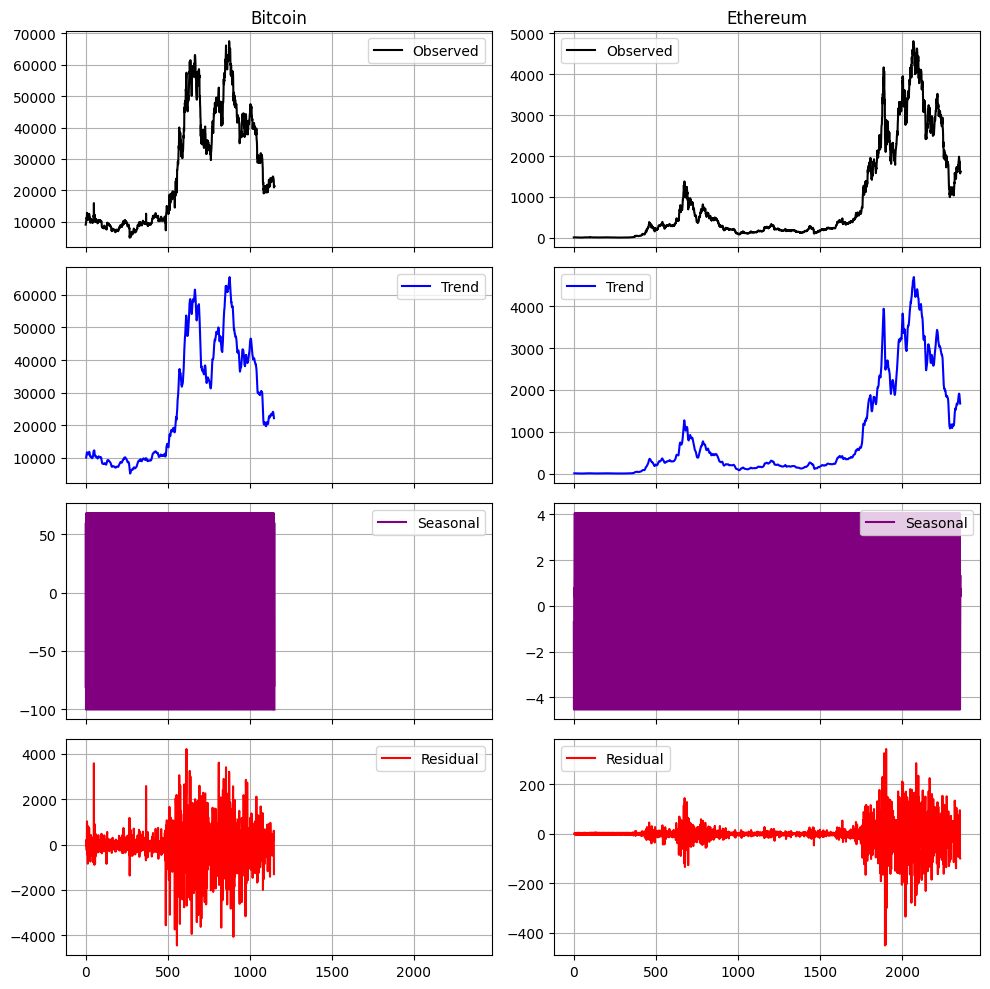

In [ ]:
## ---- CLOSING PRICE ------ ##
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the 'Close' price with a weekly pattern assumption (period=7)
btc_seasonal = seasonal_decompose(bitcoin_data['Close'], model='additive', period=7)
eth_seasonal = seasonal_decompose(ethereum_data['Close'], model='additive', period=7)

# Creating subplots for Bitcoin and Ethereum
fig, axes = plt.subplots(4, 2, figsize=(10, 10), sharex=True)

components = ['Observed', 'Trend', 'Seasonal', 'Residual']
results = [btc_seasonal, eth_seasonal]
titles = ['Bitcoin', 'Ethereum']

for col, result in enumerate(results):
    axes[0, col].set_title(titles[col])
    axes[0, col].plot(result.observed, label="Observed", color='black')
    axes[1, col].plot(result.trend, label="Trend", color='blue')
    axes[2, col].plot(result.seasonal, label="Seasonal", color='purple')
    axes[3, col].plot(result.resid, label="Residual", color='red')

    for row in range(4):
        axes[row, col].legend()
        axes[row, col].grid(True)

# Adjust layout for better readability
plt.tight_layout()
plt.show()


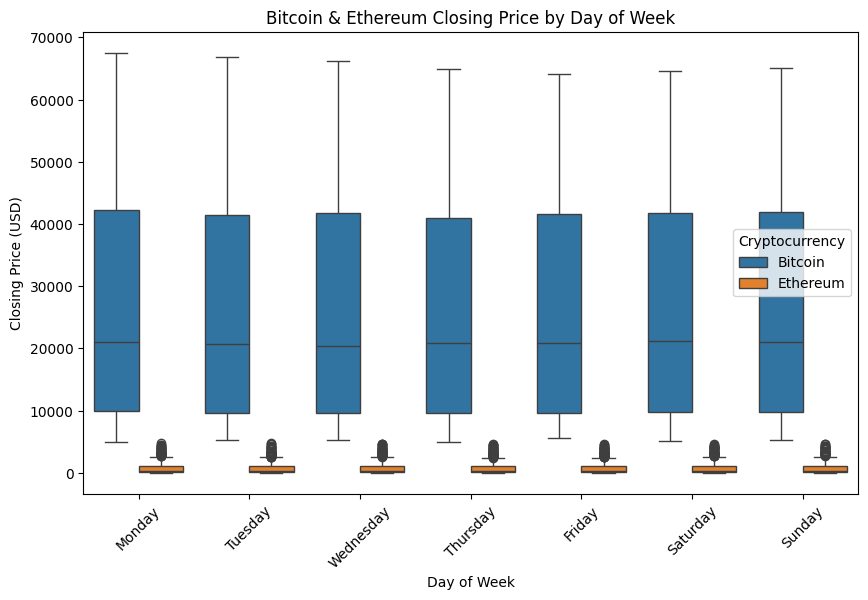

In [ ]:
# Reset index if needed for grouping
btc_reset = bitcoin_data.reset_index()
eth_reset = ethereum_data.reset_index()

# Extract weekday name
btc_reset['Weekday'] = btc_reset['Date'].dt.day_name()
eth_reset['Weekday'] = eth_reset['date'].dt.day_name()

# Add a column to distinguish the dataset (Bitcoin vs Ethereum)
btc_reset['Crypto'] = 'Bitcoin'
eth_reset['Crypto'] = 'Ethereum'

# Combine both datasets
combined_data = pd.concat([btc_reset[['Weekday', 'Close', 'Crypto']],
                           eth_reset[['Weekday', 'Close', 'Crypto']]])

# Create a boxplot of 'Close' price by weekday with hue for differentiation
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='Weekday', y='Close', hue='Crypto',
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Customize plot
plt.title('Bitcoin & Ethereum Closing Price by Day of Week')
plt.ylabel('Closing Price (USD)')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.legend(title="Cryptocurrency")
plt.grid(False)

# Show plot
plt.show()


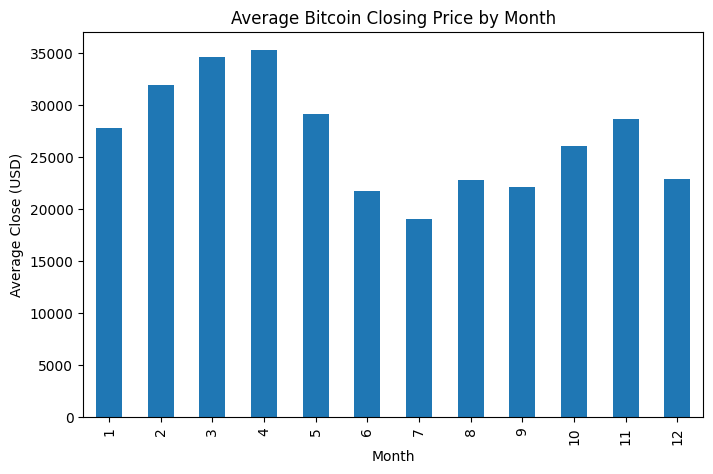

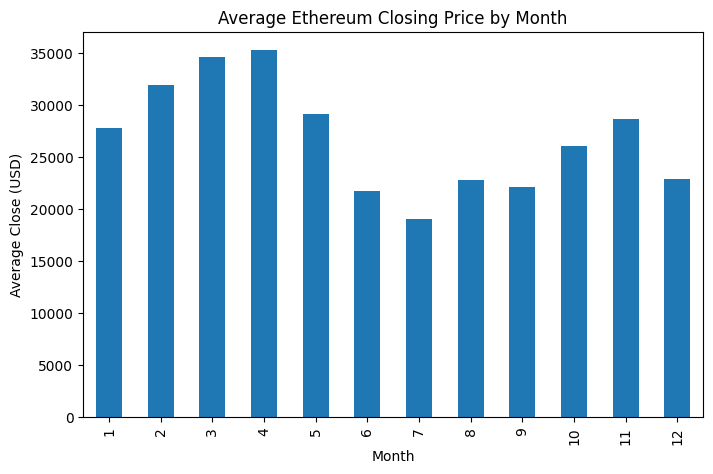

In [ ]:
btc_reset['Month'] = btc_reset['Date'].dt.month
btc_mean = btc_reset.groupby('Month')['Close'].mean()

eth_reset['Month'] = eth_reset['date'].dt.month
eth_mean = btc_reset.groupby('Month')['Close'].mean()

plt.figure(figsize=(8, 5))
btc_mean.plot(kind='bar')
plt.title('Average Bitcoin Closing Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Close (USD)')
plt.show()

plt.figure(figsize=(8, 5))
eth_mean.plot(kind='bar')
plt.title('Average Ethereum Closing Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Close (USD)')
plt.show()


<Figure size 1200x600 with 0 Axes>

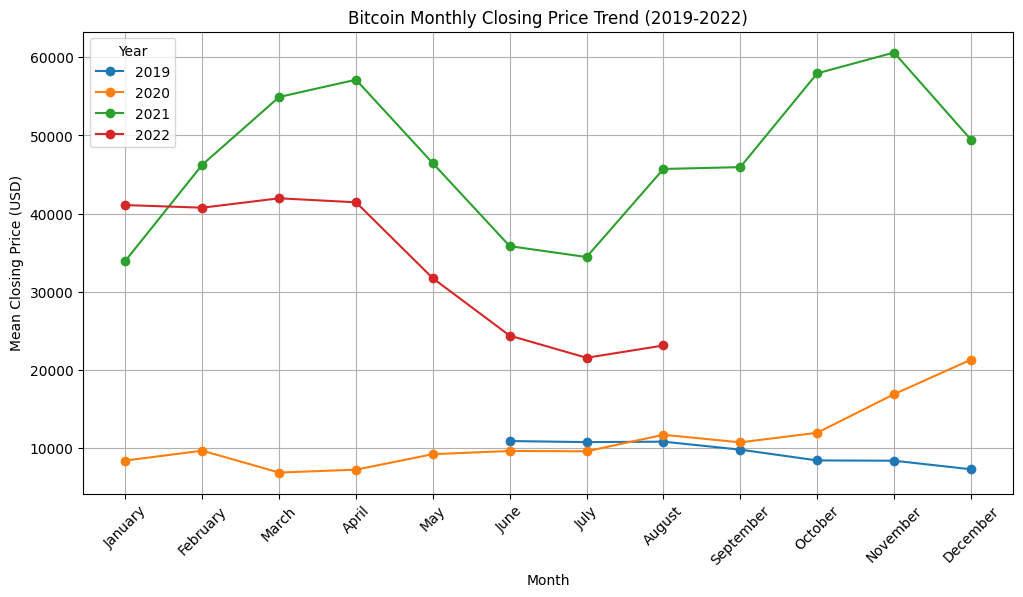

<Figure size 1200x600 with 0 Axes>

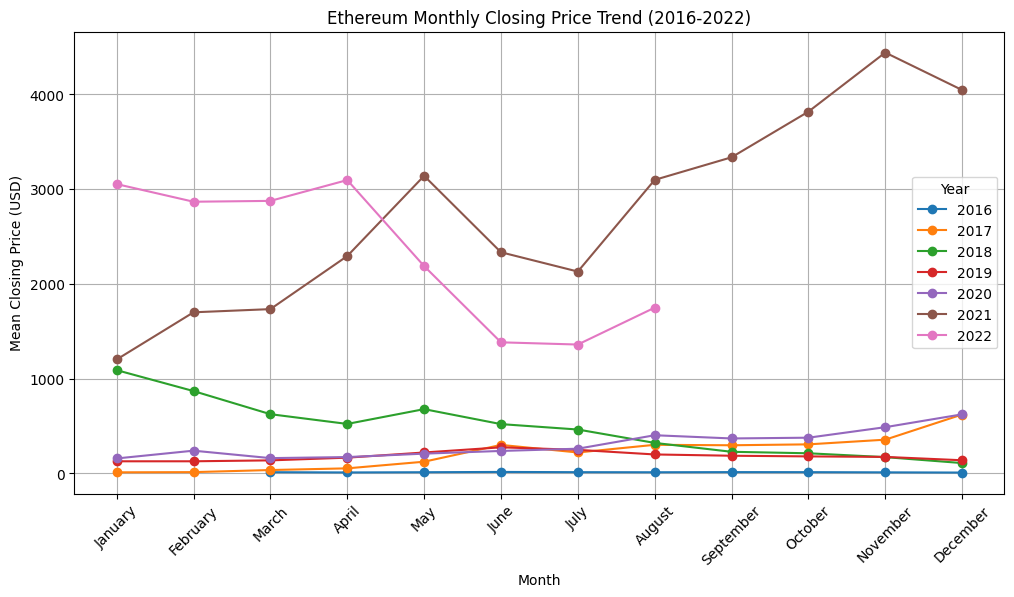

In [ ]:
# Extract Year and Month
bitcoin_data['Year'] = bitcoin_data['Date'].dt.year
bitcoin_data['Month'] = bitcoin_data['Date'].dt.month

ethereum_data['Year'] = ethereum_data['date'].dt.year
ethereum_data['Month'] = ethereum_data['date'].dt.month


# Define month names
month_names = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Calculate the mean closing price for each month across all years
trend_btc = bitcoin_data.groupby(['Year', 'Month'])['Close'].mean().unstack(level=0)

trend_eth = ethereum_data.groupby(['Year', 'Month'])['Close'].mean().unstack(level=0)

# Plot the monthly trend
plt.figure(figsize=(12, 6))
trend_btc.plot(marker='o', figsize=(12, 6))

plt.title("Bitcoin Monthly Closing Price Trend (2019-2022)")
plt.xlabel("Month")
plt.ylabel("Mean Closing Price (USD)")
plt.legend(title="Year")
plt.grid(True)

# Set x-axis tick labels to month names
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=45)

# Show plot
plt.show()
print("\n")
# Plot the monthly trend
plt.figure(figsize=(12, 6))
trend_eth.plot(marker='o', figsize=(12, 6))

plt.title("Ethereum Monthly Closing Price Trend (2016-2022)")
plt.xlabel("Month")
plt.ylabel("Mean Closing Price (USD)")
plt.legend(title="Year")
plt.grid(True)

# Set x-axis tick labels to month names
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=45)

# Show plot
plt.show()


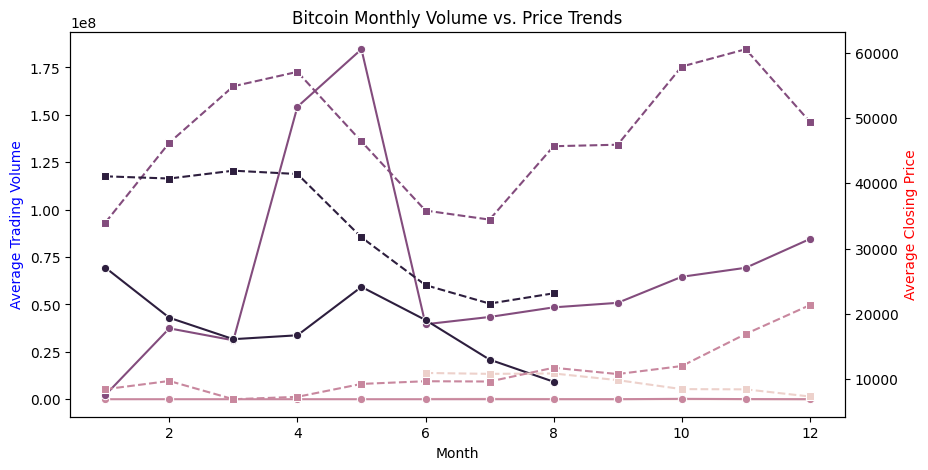

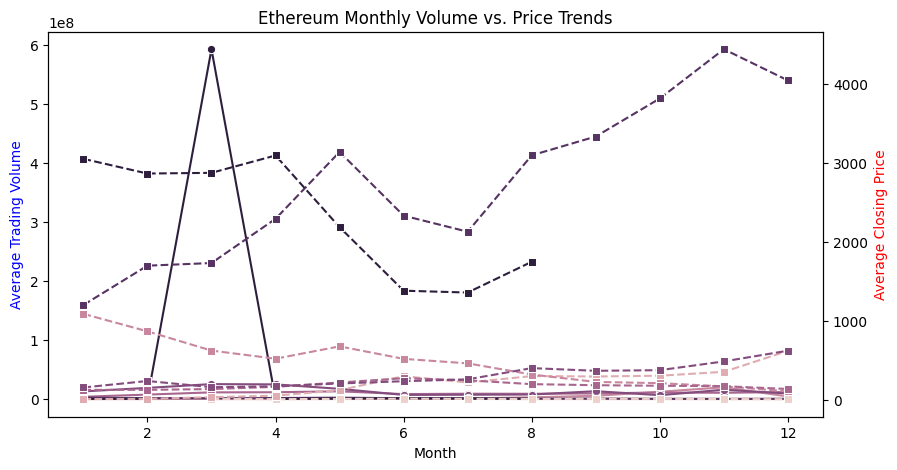



Bitcoin Volume-Price Correlation:
           Volume     Close
Volume  1.000000  0.757897
Close   0.757897  1.000000


Ethereum Volume-Price Correlation:
           price     Close
price  1.000000  0.172981
Close  0.172981  1.000000
Bitcoin Volume-Price Correlation:



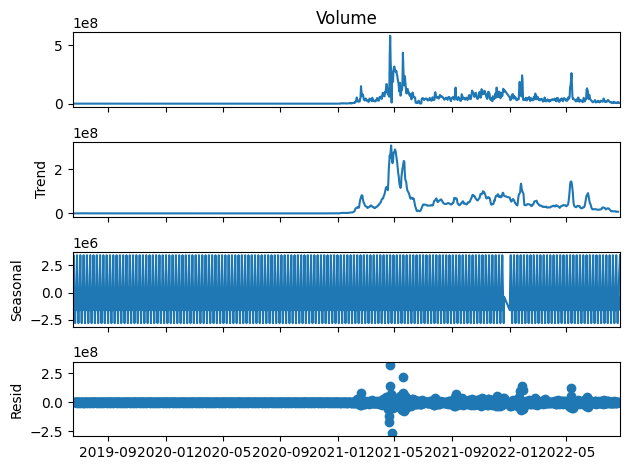



Ethereum Volume-Price Correlation:



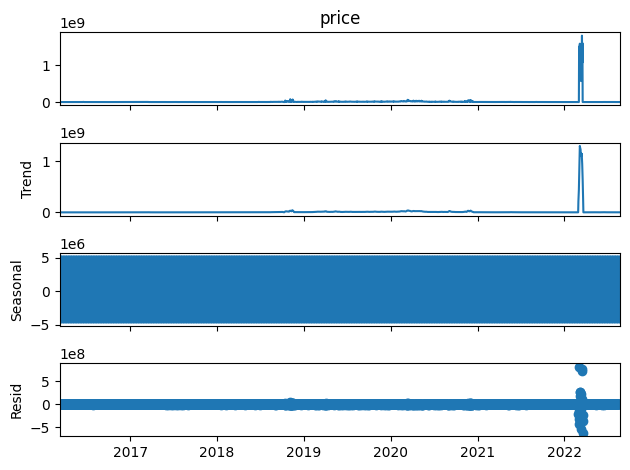

In [ ]:
## ------- Seasonal Decomposition Approach --------- ##
## ---- VOLUME ------ ##


# Aggregate average monthly volume and price
btc_monthly = bitcoin_data.groupby(["Year", "Month"]).agg({"Volume": "mean", "Close": "mean"}).reset_index()
eth_monthly = ethereum_data.groupby(["Year", "Month"]).agg({"price": "mean", "Close": "mean"}).reset_index()


# Plot Bitcoin Volume vs. Price Trends
fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
sns.lineplot(data=btc_monthly, x="Month", y="Volume", hue="Year", ax=ax1, marker="o", legend=False)
sns.lineplot(data=btc_monthly, x="Month", y="Close", hue="Year", ax=ax2, marker="s", linestyle="dashed", legend=False)

ax1.set_xlabel("Month")
ax1.set_ylabel("Average Trading Volume", color="blue")
ax2.set_ylabel("Average Closing Price", color="red")
ax1.set_title("Bitcoin Monthly Volume vs. Price Trends")

plt.show()

print("\n")
# Plot Ethereum Volume vs. Price Trends
fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
sns.lineplot(data=eth_monthly, x="Month", y="price", hue="Year", ax=ax1, marker="o", legend=False)
sns.lineplot(data=eth_monthly, x="Month", y="Close", hue="Year", ax=ax2, marker="s", linestyle="dashed", legend=False)

ax1.set_xlabel("Month")
ax1.set_ylabel("Average Trading Volume", color="blue")
ax2.set_ylabel("Average Closing Price", color="red")
ax1.set_title("Ethereum Monthly Volume vs. Price Trends")

plt.show()

print("\n")
btc_corr = btc_monthly[["Volume", "Close"]].corr()
eth_corr = eth_monthly[["price", "Close"]].corr()

print("Bitcoin Volume-Price Correlation:\n", btc_corr)
print("\n")
print("Ethereum Volume-Price Correlation:\n", eth_corr)

from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition for Bitcoin volume
print("Bitcoin Volume-Price Correlation:\n")

btc_decomp = seasonal_decompose(bitcoin_data.set_index("Date")["Volume"], model="additive", period=7)
btc_decomp.plot()
plt.show()
print("\n")
# Perform seasonal decomposition for Ethereum volume
print("Ethereum Volume-Price Correlation:\n")
eth_decomp = seasonal_decompose(ethereum_data.set_index("date")["price"], model="additive", period= 7)
eth_decomp.plot()
plt.show()



Cryptocurrency prices are highly volatile, with strong upward and downward trends and seasonal patterns. While there's no significant day-of-week effect, Bitcoin and Ethereum show some monthly seasonality, with price peaks in early and late months and dips mid-year. However, this seasonality is inconsistent year-over-year and thus only modestly predictive. Bitcoin trading volume is a key predictive factor, while Ethereum's volume is less so.

To ensure the models are robust, we integrated an anomaly detection step. Specifically, applied a rolling z-score method to identify outlier returns beyond a threshold (e.g. 3 standard deviations from the rolling mean).
Flagged anomalies can be treated by capping their effect or imputing them with a more typical value.
In this project, we discuss these aspects and ensure our train/test split avoids periods of obvious manipulation to prevent skewed evaluations.

**STATISTICAL SUMMARY**

Descriptive statistics will  reveal central tendency, dispersion, and outliers in cryptocurrency data, guiding cleaning, feature engineering, and modeling.

In [ ]:
print("Summary statistics for Bitcoin dataset:")
print(bitcoin_data.describe())
print("\n")
print("Summary statistics for Ethereum dataset:")
print(ethereum_data.describe())


Summary statistics for Bitcoin dataset:
                                Date          Open          High  \
count                           1151   1151.000000   1151.000000   
mean   2021-01-15 05:41:32.788879104  26488.652992  27528.416710   
min              2019-06-18 00:00:00   4943.832520   5338.512695   
25%              2020-03-31 12:00:00   9706.758301  10090.012695   
50%              2021-01-13 00:00:00  20873.337891  21867.822266   
75%              2021-10-27 12:00:00  41782.333984  42749.439453   
max              2022-08-23 00:00:00  67470.437500  85563.984375   
std                              NaN  17963.101635  18432.925246   

                Low         Close        Volume         Year        Month  
count   1151.000000   1151.000000  1.151000e+03  1151.000000  1151.000000  
mean   25416.606967  26496.733082  2.874051e+07  2020.543006     6.504778  
min        0.076853   4936.755371  0.000000e+00  2019.000000     1.000000  
25%     9360.636230   9712.636719  7.495500

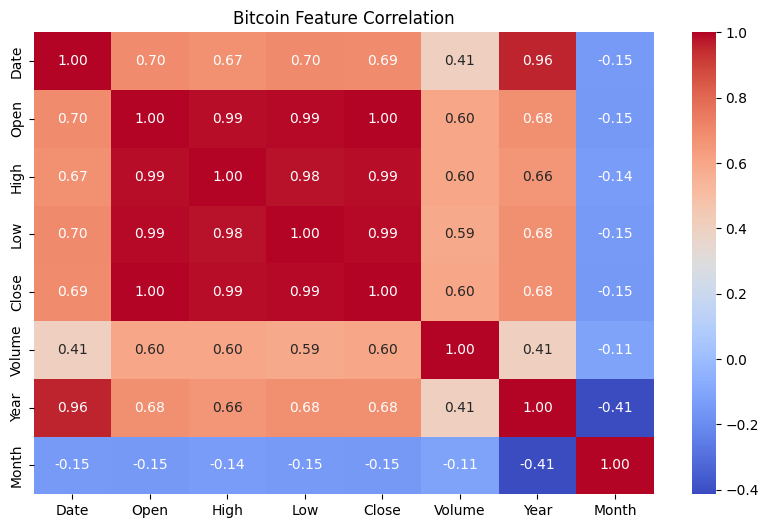

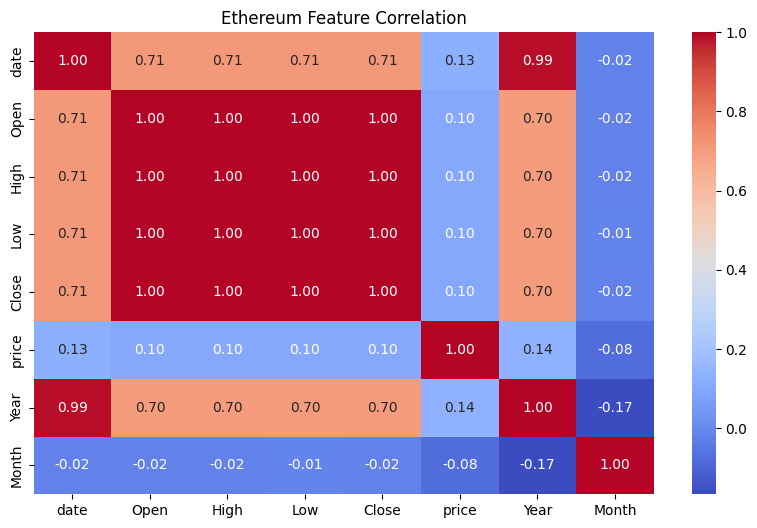

In [ ]:
# Drop the "Currency" column
btc_new = bitcoin_data.drop(columns=['Currency'])
eth_new = ethereum_data.drop(columns=['Currency'])

# Compute correlation matrices
bitcoin_cr = btc_new.corr()
ethereum_cr = eth_new.corr()

# Plot Bitcoin Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(bitcoin_cr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Bitcoin Feature Correlation")
plt.show()
print("\n")
# Plot Ethereum Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(ethereum_cr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ethereum Feature Correlation")
plt.show()

The descriptive analysis reveals :   

*   High volatility in Bitcoin & Ethereum prices.
*   Close price is sufficient;Open, High, Low are redundant.
*   Volume affects Bitcoin moderately, but weak for Ethereum.
*   Seasonality impact is low on price movements.

**DATA PREPROCESSING**


1.   **TARGET VARIABLE**
      
      When defining the target variable for price prediction, the goal is to forecast future prices, such as the next day's closing price (Géron, 2019). This was achieved by shifting the current closing price column back by one time unit 'Close_future', ensuring that the model uses features from a previous time period to predict the subsequent period's closing price.

2.   FEATURE SELECTION



In [ ]:

# ==========================
# 3. BITCOIN TRANSFORMATION
# ==========================

# Drop redundant columns (keep only 'Close' and a daily return measure)
bitcoin_data['Daily_Return'] = bitcoin_data['Close'].pct_change()  # or (Close - Open)/Open
bitcoin_data.drop(columns=['Open', 'High', 'Low', 'Currency'], inplace=True, errors='ignore')
bitcoin_data.dropna(subset=['Daily_Return'], inplace=True)

# Optionally add cyclical month-of-year if you'd like seasonality
bitcoin_data['Month'] = bitcoin_data['Date'].dt.month
bitcoin_data['Month_sin'] = np.sin(2 * np.pi * bitcoin_data['Month'] / 12)
bitcoin_data['Month_cos'] = np.cos(2 * np.pi * bitcoin_data['Month'] / 12)
bitcoin_data.drop('Month', axis=1, inplace=True)

# Lag Close if desired (e.g., 1-day lag)
bitcoin_data['Close_lag1'] = bitcoin_data['Close'].shift(1)

# For a daily dataset, shift Close by -1 to get 'future' close:
bitcoin_data['Close_future'] = bitcoin_data['Close'].shift(-1)

# Rolling mean of close over 7 days
bitcoin_data['Close_7d_mean'] = bitcoin_data['Close'].rolling(window=7).mean()

# Include Volume for Bitcoin
# (Already in df_btc, so just keep it; no rename needed)
# 7-day rolling average volume
bitcoin_data['Volume_7d_avg'] = bitcoin_data['Volume'].rolling(window=7).mean()

# Optionally create lag features for Volume
bitcoin_data['Volume_lag1'] = bitcoin_data['Volume'].shift(1)

# Remove rows with NaNs
bitcoin_data.dropna(inplace=True)

# Final feature list for Bitcoin
bitcoin_features = [
    'Close',
    'Daily_Return',
    'Close_lag1',
    'Close_7d_mean',
    'Close_future',
    'Volume',
    'Volume_7d_avg',
    'Volume_lag1',
    'Month_sin',
    'Month_cos'

]

btc_final = bitcoin_data[['Date'] + bitcoin_features].copy()


# ===========================
# 4. ETHEREUM TRANSFORMATION
# ===========================

# For Ethereum, 'Price' often represents VWAP
ethereum_data.rename(columns={'price': 'VWAP'}, inplace=True)

# Drop redundant columns (keep only 'Close' + a daily return measure)
ethereum_data['Daily_Return'] = ethereum_data['Close'].pct_change()
ethereum_data.drop(columns=['Open', 'High', 'Low', 'Currency'], inplace=True, errors='ignore')

# Keep or test VWAP if desired
# For example, we can keep it as is:
# df_eth['VWAP'] can be included or tested for correlation

# Month-of-year as cyclical
ethereum_data['Month'] = ethereum_data['date'].dt.month
ethereum_data['Month_sin'] = np.sin(2 * np.pi * ethereum_data['Month'] / 12)
ethereum_data['Month_cos'] = np.cos(2 * np.pi * ethereum_data['Month'] / 12)
ethereum_data.drop('Month', axis=1, inplace=True)

# Optionally add a lag for close or VWAP
ethereum_data['Close_lag1'] = ethereum_data['Close'].shift(1)
# For a daily dataset, shift Close by -1 to get 'future' close:
ethereum_data['Close_future'] = ethereum_data['Close'].shift(-1)
# Rolling mean of close over 7 days
ethereum_data['Close_7d_mean'] = ethereum_data['Close'].rolling(window=7).mean()
ethereum_data['VWAP_lag1'] = ethereum_data['VWAP'].shift(1)

# Remove NaNs
ethereum_data.dropna(inplace=True)

# Final feature list for Ethereum
ethereum_features = [
    'Close',
    'Daily_Return',
    'Close_lag1',
    'Close_7d_mean',
    'Close_future',
    'VWAP',
    'VWAP_lag1',
    'Month_sin',
    'Month_cos'

]

eth_final = ethereum_data[['date'] + ethereum_features].copy()


# 5. Quick Preview of Final DataFrames
print("Bitcoin Final DataFrame:")
print(btc_final.head())

print("\nEthereum Final DataFrame:")
print(eth_final.head())


Bitcoin Final DataFrame:
         Date         Close  Daily_Return    Close_lag1  Close_7d_mean  \
7  2019-06-25  11666.965820      0.059620  11010.517578   10508.948800   
8  2019-06-26  12827.663086      0.099486  11666.965820   11016.977818   
9  2019-06-27  11136.211914     -0.131860  12827.663086   11247.979492   
10 2019-06-28  12398.671875      0.113365  11136.211914   11572.361468   
11 2019-06-29  11915.464844     -0.038972  12398.671875   11743.144810   

    Close_future    Volume  Volume_7d_avg  Volume_lag1     Month_sin  \
7   12827.663086   95820.0   89848.285714     106205.0  1.224647e-16   
8   11136.211914   67574.0   80776.428571      95820.0  1.224647e-16   
9   12398.671875  117404.0   85683.857143      67574.0  1.224647e-16   
10  11915.464844   96399.0   88565.571429     117404.0  1.224647e-16   
11  10757.251953   44215.0   82812.714286      96399.0  1.224647e-16   

    Month_cos  
7        -1.0  
8        -1.0  
9        -1.0  
10       -1.0  
11       -1.0  



FEATURE SCALING

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler_btc = StandardScaler()
scaler_eth = StandardScaler()

# === For BITCOIN ===
btc_features = ['Close','Daily_Return','Close_lag1','Close_7d_mean','Volume','Volume_7d_avg','Volume_lag1','Month_sin','Month_cos']

btc_target = "Close_future"

X1 = btc_final[btc_features].copy()
y1 = btc_final[btc_target].copy()

# Apply Standardization (Only on Features, Not Target)
X1_scaled = scaler_btc.fit_transform(X1)

# # TimeSeriesSplit
# split_btc = TimeSeriesSplit(n_splits=3)


# === For ETHEREUM ===
eth_features = ['Close','Daily_Return','Close_lag1','Close_7d_mean','VWAP','VWAP_lag1','Month_sin','Month_cos']

eth_target = "Close_future"

X2 = eth_final[eth_features].copy()
y2 = eth_final[eth_target].copy()

X2_scaled = scaler_eth.fit_transform(X2)

# split_eth = TimeSeriesSplit(n_splits=3)

FILTER METHOD

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import KBinsDiscretizer, MinMaxScaler
import numpy as np

# === Feature Selection for BITCOIN ===
btc_selected_features = btc_features.copy()
eth_selected_features = eth_features.copy()

# Information Gain (Mutual Information)
btc_mi_scores = mutual_info_regression(X1_scaled, y1)
eth_mi_scores = mutual_info_regression(X2_scaled, y2)

btc_mi_dict = dict(zip(btc_selected_features, btc_mi_scores))
eth_mi_dict = dict(zip(eth_selected_features, eth_mi_scores))


# Set thresholds for feature selection
threshold_mi = 0.01  # Adjust as needed for Information Gain

# Selecting features based on Information Gain and Chi-Square
btc_selected_mi = [k for k, v in btc_mi_dict.items() if v >= threshold_mi]
eth_selected_mi = [k for k, v in eth_mi_dict.items() if v >= threshold_mi]

# Print Results
print("Bitcoin Feature Selection - Information Gain:")
for k, v in btc_mi_dict.items():
    print(f"{k}: {v:.3f}")
print("\nSelected Bitcoin Features (Information Gain):")
print('\n'.join(btc_selected_mi))
print("\nEthereum Feature Selection - Information Gain:")
for k, v in eth_mi_dict.items():
    print(f"{k}: {v:.3f}")
print("\nSelected Ethereum Features (Information Gain):")
print('\n'.join(eth_selected_mi))


Bitcoin Feature Selection - Information Gain:
Close: 2.467
Daily_Return: 0.016
Close_lag1: 2.182
Close_7d_mean: 2.085
Volume: 0.806
Volume_7d_avg: 1.013
Volume_lag1: 0.816
Month_sin: 0.599
Month_cos: 0.577

Selected Bitcoin Features (Information Gain):
Close
Daily_Return
Close_lag1
Close_7d_mean
Volume
Volume_7d_avg
Volume_lag1
Month_sin
Month_cos

Ethereum Feature Selection - Information Gain:
Close: 3.172
Daily_Return: 0.047
Close_lag1: 2.836
Close_7d_mean: 2.653
VWAP: 0.811
VWAP_lag1: 0.799
Month_sin: 0.571
Month_cos: 0.575

Selected Ethereum Features (Information Gain):
Close
Daily_Return
Close_lag1
Close_7d_mean
VWAP
VWAP_lag1
Month_sin
Month_cos


WRAPPER METHOD

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  cross_val_score

# === Define Time-Series Cross-Validation ===
tscv = TimeSeriesSplit(n_splits=3)

# === Define Base Estimator for RFE ===
ridge_for_rfe = Ridge(alpha=1.0)

# ============================ BITCOIN ============================

# Define RFE pipeline (Scaling -> RFE -> Ridge Regression)
pipeline_btc = Pipeline([
    ('rfe', RFE(estimator=ridge_for_rfe, n_features_to_select=4)),  # Select top 4 features
    ('final_ridge', Ridge(alpha=1.0))
])

# Evaluate using TimeSeriesSplit cross-validation
btc_rfeScore = cross_val_score(
    pipeline_btc, X1_scaled, y1, cv=tscv, scoring='neg_mean_squared_error'
)

print("Bitcoin RFE CV Scores (Neg MSE):", btc_rfeScore)
print("Bitcoin RFE Mean CV Score:", np.mean(btc_rfeScore))

# Fit the RFE pipeline on the entire dataset
pipeline_btc.fit(X1_scaled, y1)

# Access RFE step to see which features are selected
btc_rfeStep = pipeline_btc.named_steps['rfe']
btc_selected_rfe_features = [f for f, s in zip(btc_features, btc_rfeStep.support_) if s]
print("\nSelected Bitcoin Features by RFE:", btc_selected_rfe_features)


# ============================ ETHEREUM ============================

# Define RFE pipeline (Scaling -> RFE -> Ridge Regression)
pipeline_eth = Pipeline([
    ('rfe', RFE(estimator=ridge_for_rfe, n_features_to_select=4)),  # Select top 4 features
    ('final_ridge', Ridge(alpha=1.0))
])

# Evaluate using TimeSeriesSplit cross-validation
eth_rfeScores = cross_val_score(
    pipeline_btc, X2_scaled, y2, cv=tscv, scoring='neg_mean_squared_error'
)

print("\nEthereum RFE CV Scores (Neg MSE):", eth_rfeScores)
print("Ethereum RFE Mean CV Score:", np.mean(eth_rfeScores))

# Fit the RFE pipeline on the entire dataset
pipeline_eth.fit(X2_scaled, y2)

# Access RFE step to see which features are selected
eth_rfeStep = pipeline_eth.named_steps['rfe']
eth_selected_rfe_features = [f for f, s in zip(eth_features, eth_rfeStep.support_) if s]
print("\nSelected Ethereum Features by RFE:", eth_selected_rfe_features)


Bitcoin RFE CV Scores (Neg MSE): [-5838132.84979473 -4878115.33642392 -2036431.19067481]
Bitcoin RFE Mean CV Score: -4250893.125631151

Selected Bitcoin Features by RFE: ['Close', 'Daily_Return', 'Close_lag1', 'Close_7d_mean']

Ethereum RFE CV Scores (Neg MSE): [ -1885.23872528   -501.41023614 -20799.66115387]
Ethereum RFE Mean CV Score: -7728.77003842975

Selected Ethereum Features by RFE: ['Close', 'Daily_Return', 'Close_lag1', 'Close_7d_mean']


EMBEDDED METHODS

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit, cross_val_score


# === Define Time-Series Cross-Validation ===
tscv = TimeSeriesSplit(n_splits=3)

# ============================ BITCOIN ============================

# Define LASSO pipeline (Scaling -> LASSO Regression)
btc_lassoPipeline = Pipeline([
    ('lasso', Lasso(alpha=0.01, max_iter=10000))
])

# Evaluate using TimeSeriesSplit cross-validation
btc_lassoScores = cross_val_score(
    btc_lassoPipeline, X1_scaled, y1, cv=tscv, scoring='neg_mean_squared_error'
)

print("Bitcoin LASSO CV Scores (Neg MSE):", btc_lassoScores)
print("Bitcoin LASSO Mean CV Score:", np.mean(btc_lassoScores))

# Fit LASSO on entire dataset to see final coefficients
btc_lassoPipeline.fit(X1_scaled, y1)

btc_lassoModel = btc_lassoPipeline.named_steps['lasso']
btc_coeffs = btc_lassoModel.coef_

# Zip feature names with coefficients
print("\nBitcoin Feature Importance (LASSO Coefficients):")
btc_selected_lasso_features = []
for feat_name, coef_val in zip(btc_features, btc_coeffs):
    print(f"{feat_name}: {coef_val:.4f}")
    if abs(coef_val) > 0.001:  # Features with non-zero coefficients are retained
        btc_selected_lasso_features.append(feat_name)

print("\nSelected Bitcoin Features by LASSO:")
print('\n'.join(btc_selected_lasso_features))

# ============================ ETHEREUM ============================

# Define LASSO pipeline (Scaling -> LASSO Regression)
eth_lassoPipeline = Pipeline([
    ('lasso', Lasso(alpha=0.01, max_iter=10000))
])

# Evaluate using TimeSeriesSplit cross-validation
eth_lassoScores = cross_val_score(
    eth_lassoPipeline, X2_scaled, y2, cv=tscv, scoring='neg_mean_squared_error'
)

print("\nEthereum LASSO CV Scores (Neg MSE):", eth_lassoScores)
print("Ethereum LASSO Mean CV Score:", np.mean(eth_lassoScores))

# Fit LASSO on entire dataset to see final coefficients
eth_lassoPipeline.fit(X2_scaled, y2)

eth_lassoModel = eth_lassoPipeline.named_steps['lasso']
eth_coeffs = eth_lassoModel.coef_

# Zip feature names with coefficients
print("\nEthereum Feature Importance (LASSO Coefficients):")
eth_selected_lasso_features = []
for feat_name, coef_val in zip(eth_features, eth_coeffs):
    print(f"{feat_name}: {coef_val:.4f}")
    if abs(coef_val) > 0.001:  # Features with non-zero coefficients are retained
        eth_selected_lasso_features.append(feat_name)

print("\nSelected Ethereum Features by LASSO:")
print('\n'.join(eth_selected_lasso_features))

Bitcoin LASSO CV Scores (Neg MSE): [-1.97731496e+06 -4.08252577e+09 -1.91336457e+06]
Bitcoin LASSO Mean CV Score: -1362138815.5849104

Bitcoin Feature Importance (LASSO Coefficients):
Close: 17901.8642
Daily_Return: -169.3800
Close_lag1: 274.9800
Close_7d_mean: -252.9735
Volume: 113.4518
Volume_7d_avg: -48.2804
Volume_lag1: -93.1723
Month_sin: -9.0792
Month_cos: 60.7392

Selected Bitcoin Features by LASSO:
Close
Daily_Return
Close_lag1
Close_7d_mean
Volume
Volume_7d_avg
Volume_lag1
Month_sin
Month_cos

Ethereum LASSO CV Scores (Neg MSE): [ -1004.95208633   -354.56007984 -18398.51401957]
Ethereum LASSO Mean CV Score: -6586.008728581614

Ethereum Feature Importance (LASSO Coefficients):
Close: 1055.8170
Daily_Return: 1.5780
Close_lag1: 134.7248
Close_7d_mean: -41.9149
VWAP: 5.2758
VWAP_lag1: -3.2908
Month_sin: -0.9988
Month_cos: 0.7594

Selected Ethereum Features by LASSO:
Close
Daily_Return
Close_lag1
Close_7d_mean
VWAP
VWAP_lag1
Month_sin
Month_cos


MODEL IMPLEMENTATION

In [ ]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# ============================ BITCOIN DATA ============================
final_btcFeature = ['Close', 'Daily_Return', 'Close_lag1', 'Close_7d_mean']
btc_target = "Close_future"

X1_new = btc_final[final_btcFeature]
y1 = btc_final[btc_target]

# ============================ ETHEREUM DATA ============================
final_ethFeature = ['Close', 'Daily_Return', 'Close_lag1', 'Close_7d_mean', 'VWAP', 'VWAP_lag1', 'Month_sin', 'Month_cos']
eth_target = "Close_future"

X2_new = eth_final[final_ethFeature]
y2 = eth_final[eth_target]

# ============================ TRAIN-TEST SPLIT ============================
# Use TimeSeriesSplit instead of random train_test_split
tscv = TimeSeriesSplit(n_splits=3)

# Standardization (Ensuring Only Training Data is Fit)
scaler_btc = StandardScaler()
scaler_eth = StandardScaler()

X1_final = scaler_btc.fit_transform(X1_new)
X2_final = scaler_eth.fit_transform(X2_new)

# Splitting into Train (80%) and Test (20%)
split_btc = int(len(X1_new) * 0.8)
split_eth = int(len(X2_new) * 0.8)

X_train_btc, X_test_btc = X1_final[:split_btc], X1_final[split_btc:]
y_train_btc, y_test_btc = y1[:split_btc], y1[split_btc:]

X_train_eth, X_test_eth = X2_final[:split_eth], X2_final[split_eth:]
y_train_eth, y_test_eth = y2[:split_eth], y2[split_eth:]

# ============================ MODEL TRAINING ============================

# Define Models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Ridge Regression": Ridge(alpha=1.0),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# Train and Evaluate Models
results = {}

for model_name, model in models.items():
    # Train Bitcoin Model
    model.fit(X_train_btc, y_train_btc)
    y_pred_btc = model.predict(X_test_btc)
    rmse_btc = np.sqrt(mean_squared_error(y_test_btc, y_pred_btc))

    # Train Ethereum Model
    model.fit(X_train_eth, y_train_eth)
    y_pred_eth = model.predict(X_test_eth)
    rmse_eth = np.sqrt(mean_squared_error(y_test_eth, y_pred_eth))

    # Store Results
    results[model_name] = {"Bitcoin RMSE": rmse_btc, "Ethereum RMSE": rmse_eth}

# ============================ PRINT RESULTS ============================
print("\n=== Model Performance (RMSE) ===")
for model_name, scores in results.items():
    print(f"{model_name}: Bitcoin RMSE = {scores['Bitcoin RMSE']:.3f}, Ethereum RMSE = {scores['Ethereum RMSE']:.3f}")



=== Model Performance (RMSE) ===
Random Forest: Bitcoin RMSE = 1958.120, Ethereum RMSE = 448.701
Ridge Regression: Bitcoin RMSE = 1238.049, Ethereum RMSE = 157.486
KNN: Bitcoin RMSE = 2293.286, Ethereum RMSE = 719.523



Best Performing Model: Ridge Regression

=== Bitcoin Hyperparameter Results ===
Best Params (Bitcoin): {'alpha': 0.1}
Best Score (Bitcoin): -3417037.5063628894

=== Ethereum Hyperparameter Results ===
Best Params (Ethereum): {'alpha': 0.1}
Best Score (Ethereum): -1821.8651377193426


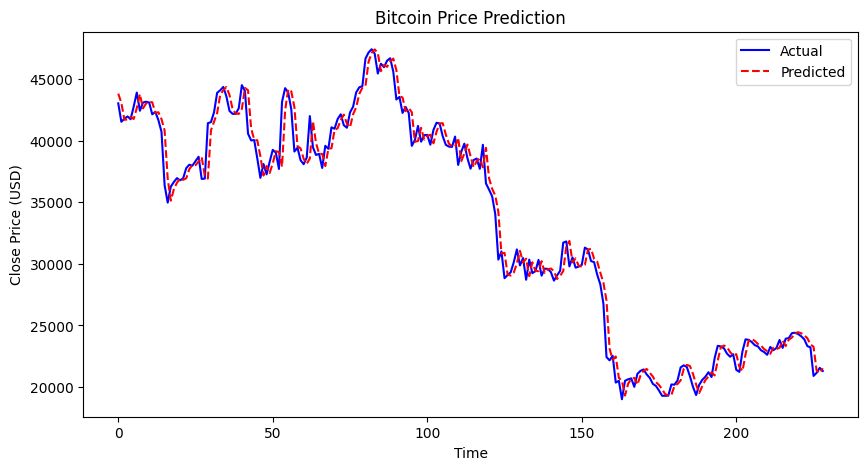

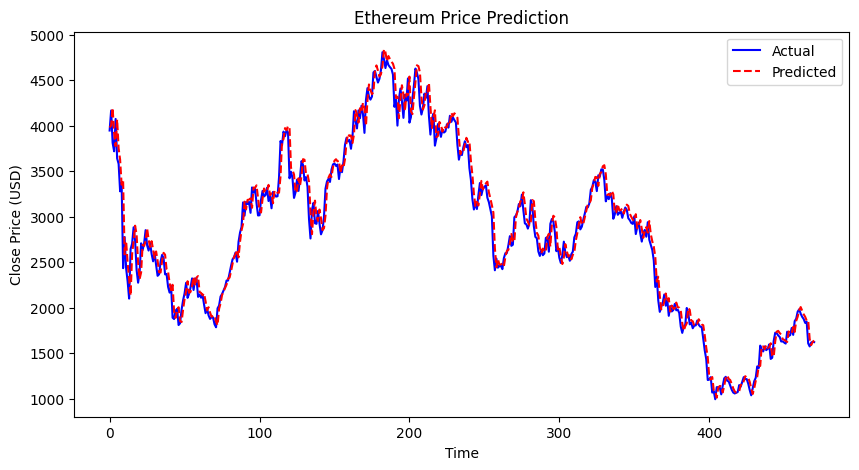

In [ ]:
from sklearn.model_selection import GridSearchCV


# ===================== FIND BEST MODEL (LOWEST RMSE) =======================
best_model_name = min(results, key=lambda k: results[k]['Bitcoin RMSE'] + results[k]['Ethereum RMSE'])
print(f"\nBest Performing Model: {best_model_name}")

# ===================== HYPERPARAMETER TUNING (GRID SEARCH) =======================
if best_model_name == "Random Forest":
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None]
    }
    best_model = RandomForestRegressor(random_state=42)

elif best_model_name == "Ridge Regression":
    param_grid = {
        'alpha': [0.1, 1, 10, 100]
    }
    best_model = Ridge()

elif best_model_name == "KNN":
    param_grid = {
        'n_neighbors': [3, 5, 7, 10]
    }
    best_model = KNeighborsRegressor()

# Grid Search for Bitcoin
grid_search_btc = GridSearchCV(best_model, param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid_search_btc.fit(X_train_btc, y_train_btc)

# Grid Search for Ethereum
grid_search_eth = GridSearchCV(best_model, param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid_search_eth.fit(X_train_eth, y_train_eth)

# Print best hyperparameters
print("\n=== Bitcoin Hyperparameter Results ===")
print("Best Params (Bitcoin):", grid_search_btc.best_params_)
print("Best Score (Bitcoin):", grid_search_btc.best_score_)

print("\n=== Ethereum Hyperparameter Results ===")
print("Best Params (Ethereum):", grid_search_eth.best_params_)
print("Best Score (Ethereum):", grid_search_eth.best_score_)

# Train the best model with tuned hyperparameters
best_btc_model = grid_search_btc.best_estimator_
best_eth_model = grid_search_eth.best_estimator_

# Predict
y_pred_btc = best_btc_model.predict(X_test_btc)
y_pred_eth = best_eth_model.predict(X_test_eth)

# ===================== VISUALIZE ACTUAL VS PREDICTED PRICES =======================
def plot_predictions(y_test, y_pred, title):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label="Actual", color="blue")
    plt.plot(y_pred, label="Predicted", color="red", linestyle="dashed")
    plt.legend()
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Close Price (USD)")
    plt.show()

# Plot Bitcoin Predictions
plot_predictions(y_test_btc, y_pred_btc, "Bitcoin Price Prediction")

# Plot Ethereum Predictions
plot_predictions(y_test_eth, y_pred_eth, "Ethereum Price Prediction")


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name, dataset):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n🔹 {model_name} Performance Metrics for {dataset}:")
    print(f"📌 Mean Absolute Error (MAE): {mae:.3f}")
    print(f"📌 Mean Squared Error (MSE): {mse:.3f}")
    print(f"📌 Root Mean Squared Error (RMSE): {rmse:.3f}")
    print(f"📌 R² Score: {r2:.3f}")

# Train and Evaluate Models
results = {}

for model_name, model in models.items():
    # Train Bitcoin Model
    model.fit(X_train_btc, y_train_btc)
    y_pred_btc = model.predict(X_test_btc)

    # Evaluate Bitcoin Model
    evaluate_model(y_test_btc, y_pred_btc, model_name, "Bitcoin")

    # Train Ethereum Model
    model.fit(X_train_eth, y_train_eth)
    y_pred_eth = model.predict(X_test_eth)

    # Evaluate Ethereum Model
    evaluate_model(y_test_eth, y_pred_eth, model_name, "Ethereum")




🔹 Random Forest Performance Metrics for Bitcoin:
📌 Mean Absolute Error (MAE): 1524.040
📌 Mean Squared Error (MSE): 3834232.425
📌 Root Mean Squared Error (RMSE): 1958.120
📌 R² Score: 0.951

🔹 Random Forest Performance Metrics for Ethereum:
📌 Mean Absolute Error (MAE): 332.245
📌 Mean Squared Error (MSE): 201332.885
📌 Root Mean Squared Error (RMSE): 448.701
📌 R² Score: 0.766

🔹 Ridge Regression Performance Metrics for Bitcoin:
📌 Mean Absolute Error (MAE): 863.394
📌 Mean Squared Error (MSE): 1532766.195
📌 Root Mean Squared Error (RMSE): 1238.049
📌 R² Score: 0.980

🔹 Ridge Regression Performance Metrics for Ethereum:
📌 Mean Absolute Error (MAE): 115.031
📌 Mean Squared Error (MSE): 24801.850
📌 Root Mean Squared Error (RMSE): 157.486
📌 R² Score: 0.971

🔹 KNN Performance Metrics for Bitcoin:
📌 Mean Absolute Error (MAE): 1828.836
📌 Mean Squared Error (MSE): 5259162.284
📌 Root Mean Squared Error (RMSE): 2293.286
📌 R² Score: 0.933

🔹 KNN Performance Metrics for Ethereum:
📌 Mean Absolute Error (M